In [136]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [137]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [138]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [139]:
# pip install mat73

In [140]:
# import mat73

In [141]:
# mat1=mat73.loadmat('/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_DB2_sEMG_preprocess_data.mat')
# nina_raw_train=mat1['Training_process_data']
# nina_raw_valid=mat1['Valid_raw_data']
# print('raw_Train_data',nina_raw_train)

In [142]:
# nina_raw_test=mat1['Testing_process_data'] 
# # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [143]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Train.csv", nina_raw_train, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [144]:
# np.savetxt("/media/naveen/nav/mat_codes/nina_DB2_codes/preprocess/nina_pro_DB2_Test.csv", nina_raw_test, delimiter=",")

In [145]:
N_FEATURES = 8

In [146]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [147]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [148]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [149]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [150]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'

In [151]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/Biopatrec_seg_CW_WOR_BP_D2_train.csv


In [152]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/Biopatrec_seg_CW_WOR_BP_D2_test.csv


In [153]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.00448,0.01648,0.00197,0.00296,0.00400,0.00791,0.00331,0.00420,1.00000
1,0.03458,0.57256,0.23017,0.01627,0.01645,0.03088,0.02367,0.01901,1.00000
2,0.08453,1.07690,0.45949,0.02305,0.01593,0.02430,0.04322,0.00502,1.00000
3,0.10516,0.84744,0.49885,0.02238,0.01876,0.01293,0.02007,0.00862,1.00000
4,0.08748,0.36154,0.56439,0.01434,0.00317,0.01818,0.01817,0.00044,1.00000
5,0.10048,0.43969,0.70231,0.00154,0.00375,0.04157,0.03946,0.00286,1.00000
6,0.09146,0.57539,0.42486,0.01442,0.01405,0.04455,0.00711,0.00808,1.00000
7,0.02266,0.38269,0.01578,0.00910,0.01698,0.02801,0.02188,0.02418,1.00000
8,0.02997,0.04121,0.17625,0.00421,0.00545,0.08243,0.00452,0.02315,1.00000
9,0.03460,0.57509,0.27599,0.00650,0.00795,0.07625,0.00094,0.00148,1.00000


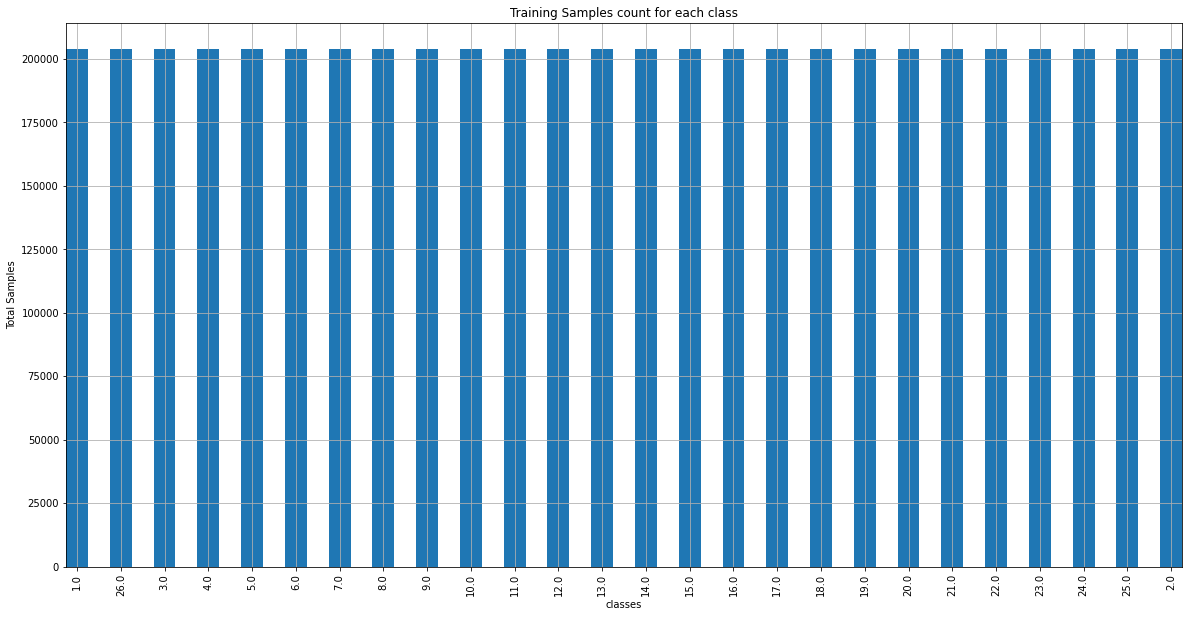

In [154]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [155]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.01505,0.01532,0.00261,0.00365,0.00465,0.00670,0.00088,0.00097,1.00000
1,0.24171,0.10114,0.12594,0.03278,0.12964,0.46500,0.14483,0.03778,1.00000
2,0.02246,0.05558,0.29109,0.06545,0.12270,0.46005,0.02488,0.13295,1.00000
3,0.05142,0.23333,0.02155,0.08531,0.08870,0.15869,0.06374,0.18378,1.00000
4,0.23704,0.42392,0.25988,0.10691,0.09910,0.20573,0.11065,0.17216,1.00000
5,0.03222,0.19682,0.12538,0.12279,0.13087,0.35303,0.09228,0.07670,1.00000
6,0.15149,0.20459,0.08770,0.05915,0.06738,0.02015,0.00375,0.02169,1.00000
7,0.08788,0.44747,0.21051,0.02029,0.03024,0.37470,0.08920,0.06618,1.00000
8,0.12403,0.45035,0.03987,0.00080,0.04623,0.50299,0.21304,0.01796,1.00000
9,0.10246,0.32557,0.18744,0.00581,0.00087,0.32867,0.23536,0.04945,1.00000


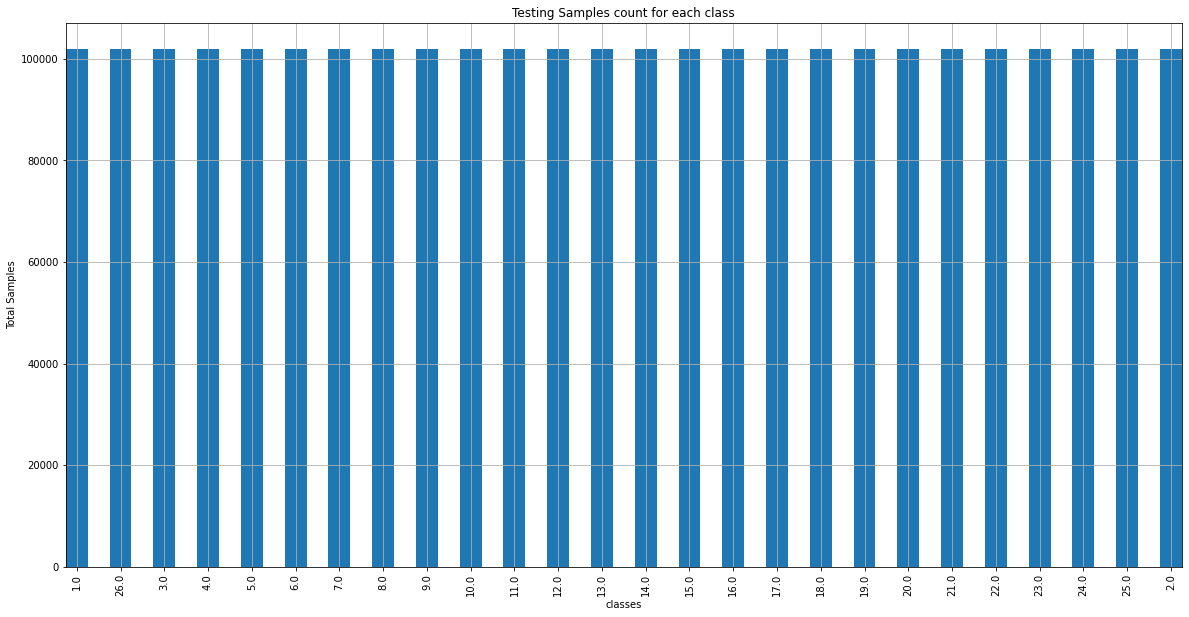

In [156]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [157]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.00448,0.01648,0.00197,0.00296,0.00400,0.00791,0.00331,0.00420,1.00000
1,0.03458,0.57256,0.23017,0.01627,0.01645,0.03088,0.02367,0.01901,1.00000
2,0.08453,1.07690,0.45949,0.02305,0.01593,0.02430,0.04322,0.00502,1.00000
3,0.10516,0.84744,0.49885,0.02238,0.01876,0.01293,0.02007,0.00862,1.00000
4,0.08748,0.36154,0.56439,0.01434,0.00317,0.01818,0.01817,0.00044,1.00000


In [158]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [159]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [160]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.71459,-0.56151,-0.55364,-0.46380,-0.43862,-0.44069,-0.46830,-0.60885,1.00000
1,-0.52761,1.52609,0.89004,-0.31025,-0.31163,-0.27056,-0.32545,-0.46207,1.00000
2,-0.21724,3.41945,2.34083,-0.23207,-0.31694,-0.31929,-0.18833,-0.60078,1.00000
3,-0.08906,2.55803,2.58984,-0.23976,-0.28808,-0.40353,-0.35076,-0.56508,1.00000
4,-0.19889,0.73390,3.00448,-0.33253,-0.44712,-0.36465,-0.36403,-0.64617,1.00000


In [161]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.01505,0.01532,0.00261,0.00365,0.00465,0.00670,0.00088,0.00097,1.00000
1,0.24171,0.10114,0.12594,0.03278,0.12964,0.46500,0.14483,0.03778,1.00000
2,0.02246,0.05558,0.29109,0.06545,0.12270,0.46005,0.02488,0.13295,1.00000
3,0.05142,0.23333,0.02155,0.08531,0.08870,0.15869,0.06374,0.18378,1.00000
4,0.23704,0.42392,0.25988,0.10691,0.09910,0.20573,0.11065,0.17216,1.00000


In [162]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [163]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.64890,-0.56586,-0.54961,-0.45586,-0.43200,-0.44964,-0.48533,-0.64095,1.00000
1,0.75935,-0.24367,0.23064,-0.11981,0.84318,2.94380,0.52430,-0.27585,1.00000
2,-0.60290,-0.41471,1.27545,0.25697,0.77238,2.90714,-0.31703,0.66788,1.00000
3,-0.42293,0.25259,-0.42980,0.48610,0.42547,0.67576,-0.04442,1.17194,1.00000
4,0.73033,0.96808,1.07800,0.73526,0.53158,1.02406,0.28457,1.05671,1.00000


In [164]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.71459 -0.56151 -0.55364 -0.46380 -0.43862 -0.44069 -0.46830   
1       -0.52761  1.52609  0.89004 -0.31025 -0.31163 -0.27056 -0.32545   
2       -0.21724  3.41945  2.34083 -0.23207 -0.31694 -0.31929 -0.18833   
3       -0.08906  2.55803  2.58984 -0.23976 -0.28808 -0.40353 -0.35076   
4       -0.19889  0.73390  3.00448 -0.33253 -0.44712 -0.36465 -0.36403   
...          ...      ...      ...      ...      ...      ...      ...   
5303995  0.76867  0.17544 -0.27494  0.58565  0.04399 -0.27414 -0.40488   
5303996 -0.38241  0.67106 -0.33686  0.88695 -0.04508 -0.31641 -0.35465   
5303997  1.12984  1.16927  0.14282  1.39909  0.18409 -0.33435 -0.25975   
5303998  4.20534  0.08620 -0.11551  1.34361  0.46644 -0.32521 -0.30091   
5303999  2.28094 -0.49908 -0.43356  0.40363  0.09876 -0.38049 -0.37252   

              C8  Class_label  ActivityEncoded  
0       -0.60885      1.00000                0  

In [165]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [166]:
# The number of steps within one time segment
TIME_PERIODS = 150
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 150

In [167]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (35359, 150, 8)
35359 training samples
y_train shape:  (35359,)
150
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (150, 8)
input_shape: (150, 8)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (35359, 26)


In [168]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (17679, 150, 8)
17679 testing samples
y_test shape:  (17679,)


In [169]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 150, 8
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (35359, 150, 8, 1)
x_test shape:  (17679, 150, 8, 1)
n_outputs 26


In [170]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [171]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 35.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [172]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [173]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [174]:
verbose, epochs, batch_size = 0, 300,32

In [175]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [176]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
model.add(Activation('tanh'))
model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [177]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=4,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [178]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=4,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# # model.add(TimeDistributed(Activation('tanh')))
# # model.add(TimeDistributed(Dropout(0.2093)))
# # model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# # model.add(TimeDistributed(Activation('tanh')))
# # model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# # model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# model.add(Flatten())
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# # model.add(Bidirectional(LSTM(200)))
# # model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [179]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 8, 64)         640       
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 8, 64)         256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 8, 64)         0         
_________________________________________________________________
activation_15 (Activation)   (None, 22, 8, 64)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 8, 64)         20544     
_________________________________________________________________
batch_normalization_14 (Batc (None, 11, 8, 64)         256       
_________________________________________________________________
activation_16 (Activation)   (None, 11, 8, 64)        

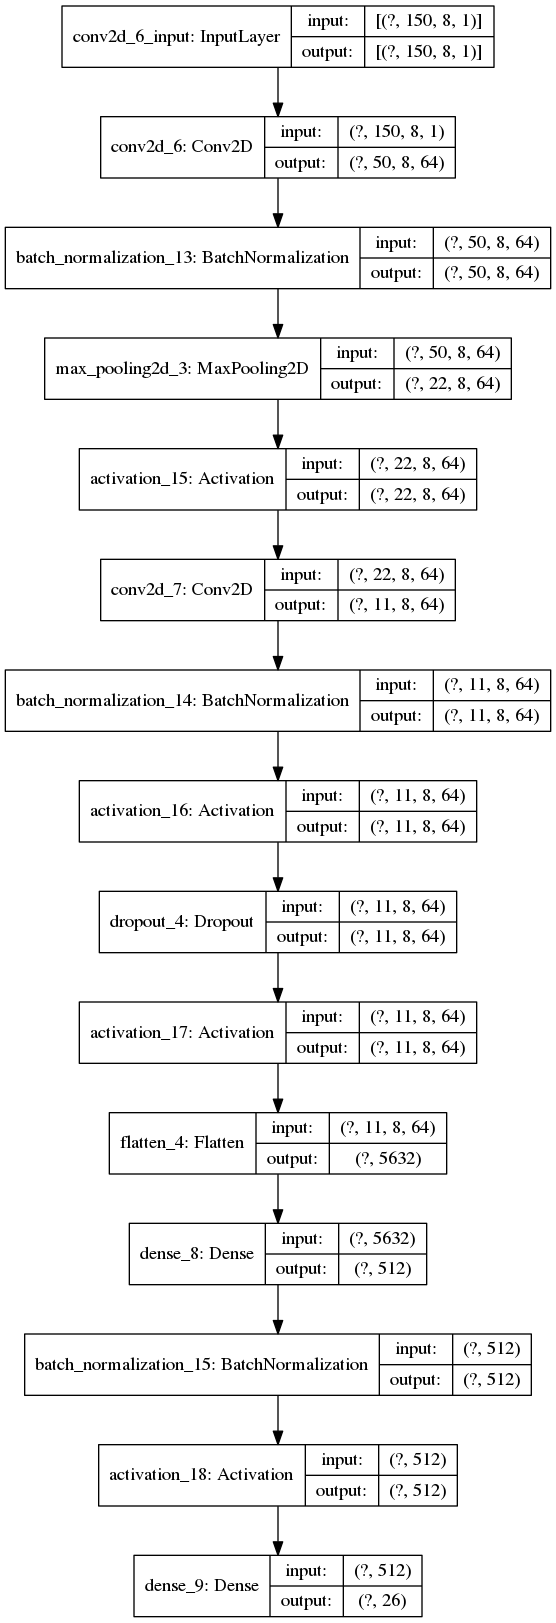

In [180]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [181]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_test, y_test_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_train, y_train_hot), verbose=1)

Epoch 1/300
553/553 [==============================] - ETA: 0s - loss: 1.8343 - accuracy: 0.4276
Epoch 00001: val_accuracy improved from -inf to 0.48921, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
553/553 [==============================] - 12s 22ms/step - loss: 1.8343 - accuracy: 0.4276 - val_loss: 1.5955 - val_accuracy: 0.4892 - lr: 0.0010
Epoch 2/300
547/553 [============================>.] - ETA: 0s - loss: 1.2174 - accuracy: 0.6275
Epoch 00002: val_accuracy improved from 0.48921 to 0.55621, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
553/553 [==============================] - 8s 14ms/step - loss: 1.2170 - accuracy: 0.6275 - val_loss: 1.4226 - val_accuracy: 0.5562 - lr: 0.0010
Epoch 3/300
546/553 [============================>.] - ETA: 0s - loss: 0.9054 - accuracy: 0.7419
Epoch 00003: val_accuracy improved from 0.55621 to 0.61724, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
5

Epoch 27/300
553/553 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9802
Epoch 00027: val_accuracy did not improve from 0.67969
553/553 [==============================] - 8s 14ms/step - loss: 0.1602 - accuracy: 0.9802 - val_loss: 1.6510 - val_accuracy: 0.6473 - lr: 0.0010
Epoch 28/300
547/553 [============================>.] - ETA: 0s - loss: 0.1563 - accuracy: 0.9821
Epoch 00028: val_accuracy did not improve from 0.67969
553/553 [==============================] - 8s 14ms/step - loss: 0.1570 - accuracy: 0.9818 - val_loss: 1.7190 - val_accuracy: 0.6405 - lr: 0.0010
Epoch 29/300
549/553 [============================>.] - ETA: 0s - loss: 0.1533 - accuracy: 0.9822
Epoch 00029: val_accuracy did not improve from 0.67969
553/553 [==============================] - 8s 15ms/step - loss: 0.1536 - accuracy: 0.9820 - val_loss: 1.5653 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 30/300
553/553 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 0.9790
Epoch 00

Epoch 52/300
553/553 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9999
Epoch 00052: val_accuracy did not improve from 0.71300
553/553 [==============================] - 7s 13ms/step - loss: 0.0640 - accuracy: 0.9999 - val_loss: 1.4907 - val_accuracy: 0.7121 - lr: 1.0000e-04
Epoch 53/300
547/553 [============================>.] - ETA: 0s - loss: 0.0632 - accuracy: 0.9997
Epoch 00053: val_accuracy did not improve from 0.71300
553/553 [==============================] - 8s 15ms/step - loss: 0.0632 - accuracy: 0.9997 - val_loss: 1.4762 - val_accuracy: 0.7127 - lr: 1.0000e-04
Epoch 54/300
550/553 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9997
Epoch 00054: val_accuracy improved from 0.71300 to 0.71422, saving model to /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/checkpoint.hdf5
553/553 [==============================] - 8s 14ms/step - loss: 0.0615 - accuracy: 0.9997 - val_loss: 1.4819 - val_accuracy: 0.7142 - lr: 1.0000e-04
Epoch 55/

Epoch 105/300
545/553 [============================>.] - ETA: 0s - loss: 0.0421 - accuracy: 0.9999
Epoch 00105: val_accuracy did not improve from 0.71623
553/553 [==============================] - 8s 14ms/step - loss: 0.0421 - accuracy: 0.9999 - val_loss: 1.5044 - val_accuracy: 0.7139 - lr: 1.0000e-06


In [182]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [183]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 90
train accuracy and validation accuracy 0.9998868703842163 0.7162250280380249


In [184]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/CNN60X100/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


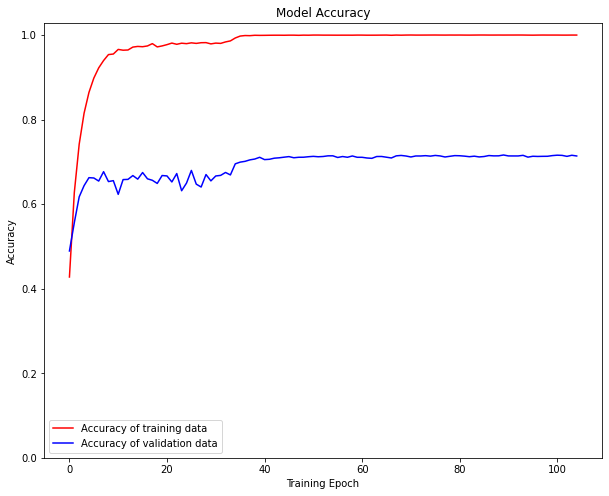

In [185]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


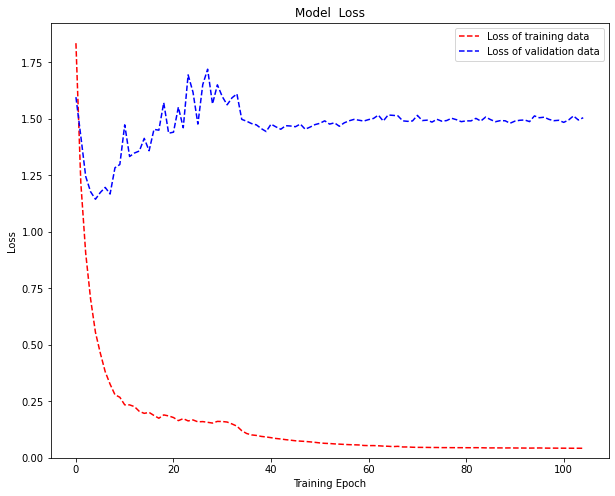

In [186]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [187]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

553/553 [==============================] - 2s 4ms/step - loss: 0.0425 - accuracy: 1.0000
test_accuracy 1.0


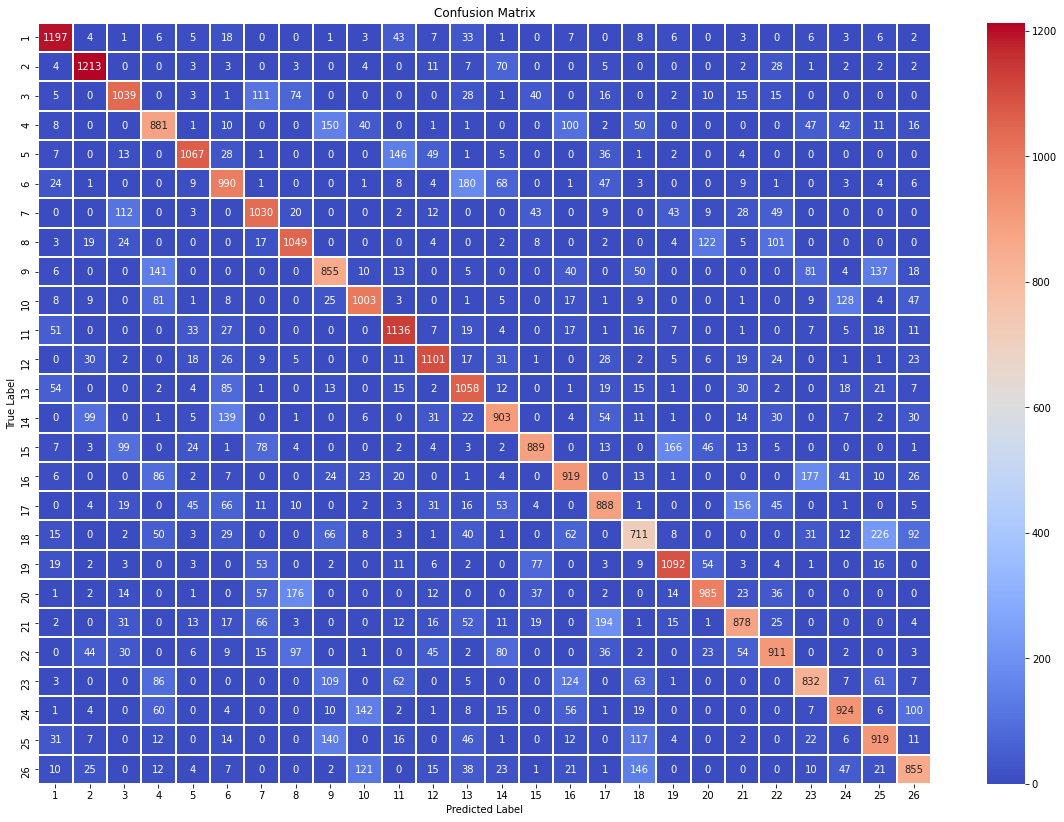

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1360
           1       0.83      0.89      0.86      1360
           2       0.75      0.76      0.76      1360
           3       0.62      0.65      0.63      1360
           4       0.85      0.78      0.82      1360
           5       0.66      0.73      0.69      1360
           6       0.71      0.76      0.73      1360
           7       0.73      0.77      0.75      1360
           8       0.61      0.63      0.62      1360
           9       0.74      0.74      0.74      1360
          10       0.75      0.84      0.79      1360
          11       0.81      0.81      0.81      1360
          12       0.67      0.78      0.72      1360
          13       0.70      0.66      0.68      1360
          14       0.79      0.65      0.72      1360
          15       0.67      0.68      0.67      1360
          16       0.65      0.65      0.65      1360
          17       0.57    

In [188]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

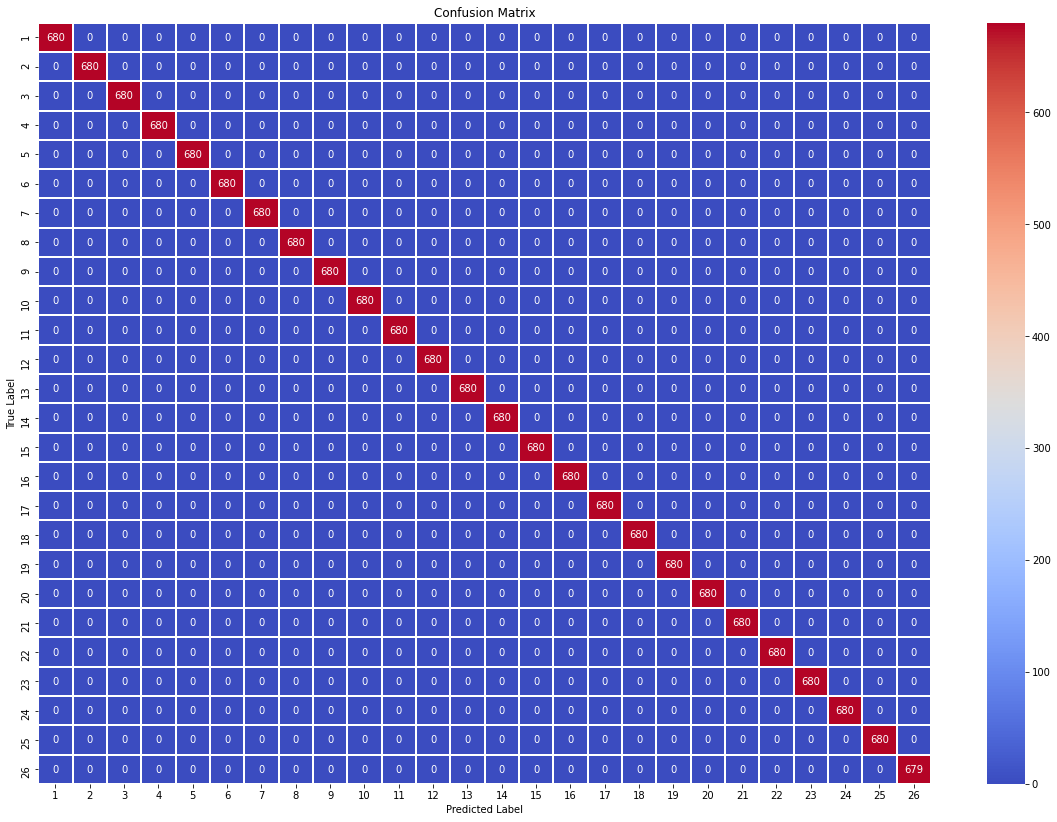

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       680
           2       1.00      1.00      1.00       680
           3       1.00      1.00      1.00       680
           4       1.00      1.00      1.00       680
           5       1.00      1.00      1.00       680
           6       1.00      1.00      1.00       680
           7       1.00      1.00      1.00       680
           8       1.00      1.00      1.00       680
           9       1.00      1.00      1.00       680
          10       1.00      1.00      1.00       680
          11       1.00      1.00      1.00       680
          12       1.00      1.00      1.00       680
          13       1.00      1.00      1.00       680
          14       1.00      1.00      1.00       680
          15       1.00      1.00      1.00       680
          16       1.00      1.00      1.00       680
          17       1.00    

In [189]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [190]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))